<a href="https://colab.research.google.com/github/jiyoungsong-pr/prac_class/blob/main/mid_exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
import random

INSURANCE MARKET AND PAYMENTS

-Factor relations between payments 

20176292 송지영 

In [29]:
from google.colab import files
uploaded = files.upload()

Saving Insurance_factor_identification.csv to Insurance_factor_identification (1).csv


In [32]:
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt

Insurance_factor_identification = pd.read_csv(io. StringIO(uploaded['Insurance_factor_identification.csv']))


TypeError: ignored

In [36]:
df=pd.read_csv('Insurance_factor_identification.csv')

In [38]:
df.head()

,Kilometres,Zone,Bonus,Make,Insured,Claims,Payment
0,1,1,1,1,455.13,108,392491
1,1,1,1,2,69.17,19,46221
2,1,1,1,3,72.88,13,15694
3,1,1,1,4,1292.39,124,422201
4,1,1,1,5,191.01,40,119373


In [42]:
df.Payments.value_counts()

AttributeError: ignored

INFORMATION OF DATA

In [71]:
df.info

<bound method DataFrame.info of       Kilometres  Zone  Bonus  Make  Insured  Claims  Payment  Damage
0              1     1      1     1   455.13     108   392491       1
1              1     1      1     2    69.17      19    46221       1
2              1     1      1     3    72.88      13    15694       1
3              1     1      1     4  1292.39     124   422201       1
4              1     1      1     5   191.01      40   119373       1
...          ...   ...    ...   ...      ...     ...      ...     ...
2177           5     7      7     5     8.74       0        0       0
2178           5     7      7     6    16.61       0        0       0
2179           5     7      7     7     2.83       1      966       1
2180           5     7      7     8    13.06       0        0       0
2181           5     7      7     9   384.87      16   112252       1

[2182 rows x 8 columns]>

DATA ANAYLISIS

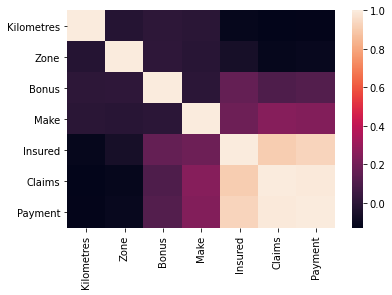

In [44]:
sns.heatmap(df.corr())

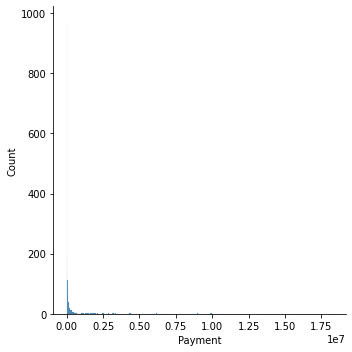

In [48]:
sns.displot(df['Payment'],kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


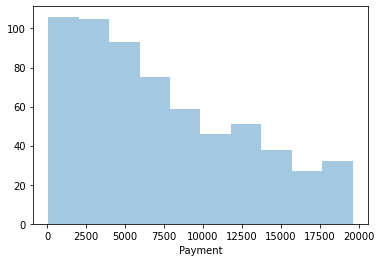

In [56]:
sns.distplot(df[(df['Payment']>0)&(df['Payment']<20000)]['Payment'], kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


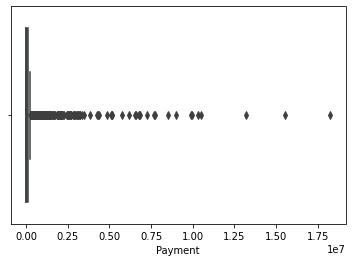

In [57]:
sns.boxplot(df['Payment'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


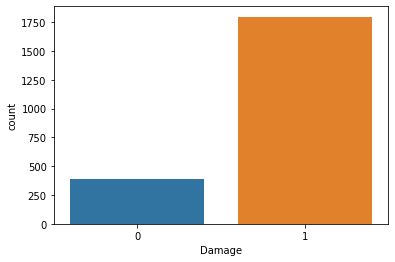

In [59]:
df['Damage']=np.where(df['Payment'],1,0)
sns.countplot(df['Damage'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


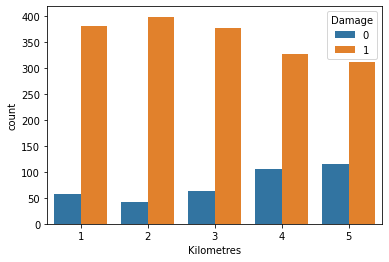

In [60]:
sns.countplot('Kilometres',data=df, hue='Damage')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


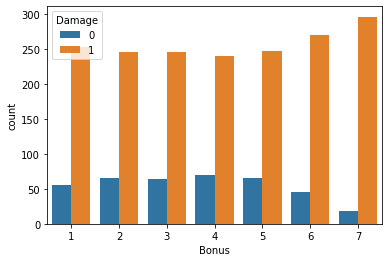

In [61]:
sns.countplot('Bonus',data=df,hue='Damage')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


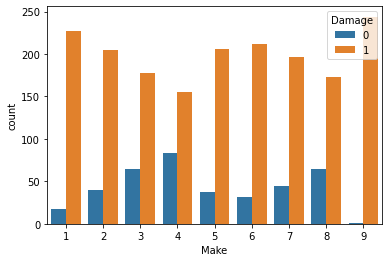

In [62]:
sns.countplot('Make',data=df,hue='Damage')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


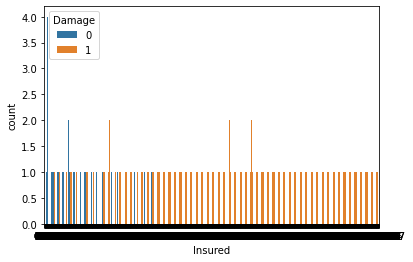

In [63]:
sns.countplot('Insured',data=df,hue='Damage')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


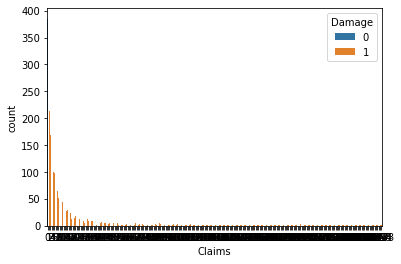

In [64]:
sns.countplot('Claims',data=df,hue='Damage')

SUM OF DAMAGES
how users received damage for years,
and relations between Insured, Claims and Make


In [65]:
count_damage_per_user=df.groupby('Insured')['Damage'].sum()
count_damage_per_user.value_counts()

1    1723
0     310
2      37
Name: Damage, dtype: int64

In [66]:
count_damage_per_user=df.groupby('Make')['Damage'].sum()
count_damage_per_user.value_counts()

206    1
205    1
155    1
173    1
197    1
212    1
227    1
178    1
244    1
Name: Damage, dtype: int64

In [67]:
count_damage_per_user=df.groupby('Claims')['Damage'].sum()
count_damage_per_user.value_counts()

1      144
2       39
4       12
6       10
3        9
5        4
8        4
9        3
7        2
29       2
13       2
28       2
14       2
10       2
12       1
15       1
214      1
17       1
16       1
169      1
19       1
24       1
34       1
38       1
44       1
46       1
51       1
65       1
66       1
98       1
100      1
131      1
0        1
Name: Damage, dtype: int64